# Complex data

Data downloaded from https://ourworldindata.org/coronavirus-testing?country

In [1]:
# Import packages
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import datetime

In [2]:
# Load in the data set
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126661 entries, 0 to 126660
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 126661 non-null  object 
 1   continent                                120930 non-null  object 
 2   location                                 126661 non-null  object 
 3   date                                     126661 non-null  object 
 4   total_cases                              119760 non-null  float64
 5   new_cases                                119756 non-null  float64
 6   new_cases_smoothed                       118742 non-null  float64
 7   total_deaths                             108803 non-null  float64
 8   new_deaths                               108956 non-null  float64
 9   new_deaths_smoothed                      118742 non-null  float64
 10  total_cases_per_million         

In [4]:
#select the columns we want
df = df[['location', 'date', 'new_cases']]
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df = df[df['location'] == 'United States']
df = df[df['date']<= '2021-10-27']

In [5]:
df.head()

,location,date,new_cases
120036,United States,2020-01-22,NaN
120037,United States,2020-01-23,0.0
120038,United States,2020-01-24,1.0
120039,United States,2020-01-25,0.0
120040,United States,2020-01-26,3.0


In [6]:
df.info()
df.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 120036 to 120680
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   645 non-null    object        
 1   date       645 non-null    datetime64[ns]
 2   new_cases  644 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.2+ KB


In [7]:
df.head()

,location,date,new_cases
120037,United States,2020-01-23,0.0
120038,United States,2020-01-24,1.0
120039,United States,2020-01-25,0.0
120040,United States,2020-01-26,3.0
120041,United States,2020-01-27,0.0


In [8]:
#Define the start time 
start = datetime.datetime(2020,1,23)
end = datetime.datetime(2021, 10, 27)

In [9]:
#Download from the web
#PFE is for the Pfizer stocks
# JNJ for Johnson & Johnson
dfP = web.DataReader('PFE', 'yahoo', start, end)
dfJ = web.DataReader('JNJ', 'yahoo', start, end)

In [10]:
dfP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-23,38.738140,38.074005,38.130932,38.624287,27148510.0,36.024601
2020-01-24,38.870968,37.609108,38.842506,37.779884,34143698.0,35.237030
2020-01-27,38.358635,37.239090,37.390892,38.102467,31964026.0,35.537899
2020-01-28,37.466793,36.005692,37.305504,36.185959,70202408.0,33.750385
2020-01-29,36.413662,35.626186,36.166985,35.654648,34165726.0,33.254841


In [11]:
# save the dataset you've just downloaded
dfP.to_csv('Pfizer_stock_2021.csv')
dfJ.to_csv('Jhonson_stock_2021.csv')

In [12]:
df1 = pd.read_csv('Pfizer_stock_2021.csv')
df1 = df1[['Date','Close']]
df1['Date'] = pd.to_datetime(df1['Date'], format = '%Y-%m-%d')
df1.head()

,Date,Close
0,2020-01-23,38.624287
1,2020-01-24,37.779884
2,2020-01-27,38.102467
3,2020-01-28,36.185959
4,2020-01-29,35.654648


In [13]:
df2 = pd.read_csv('Jhonson_stock_2021.csv')
df2 = df2[['Date','Close']]
df2['Date'] = pd.to_datetime(df2['Date'], format = '%Y-%m-%d')
df2.head()

,Date,Close
0,2020-01-23,148.529999
1,2020-01-24,148.320007
2,2020-01-27,148.750000
3,2020-01-28,149.500000
4,2020-01-29,150.539993


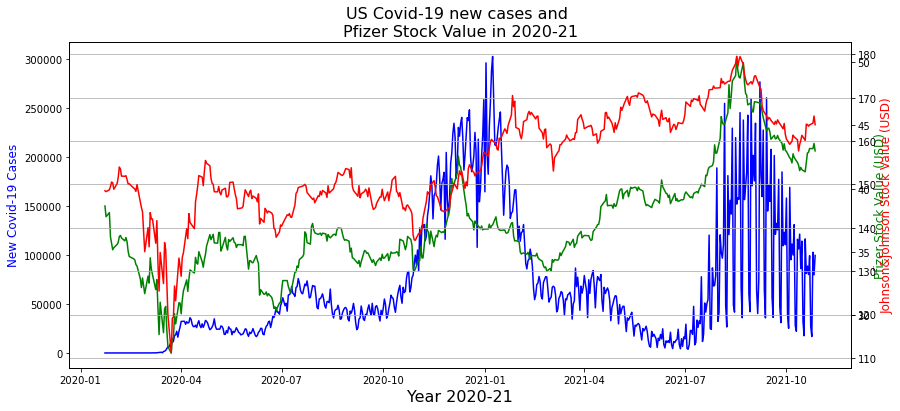

In [14]:
#Create the graph by using the teo datasets
#set the size of the graph
fig, ax1 = plt.subplots(figsize = (14,6))

#set two axes instead of one
ax2 = ax1.twinx()
ax3 = ax1.twinx()

#use the first dataset of covid
ax1.plot(df['date'], df['new_cases'], 'b')
# use the second dataset of Pfizer stock prices
ax2.plot(df1['Date'], df1['Close'], 'g')
ax3.plot(df2['Date'], df2['Close'], 'r')

# set the X axis label
ax1.set_xlabel('Year 2020-21', size = 16)

#set the Y axis label for each side to the dataset ax1 for covid ax2 for stoxk prices
ax1.set_ylabel('New Covid-19 Cases', color = 'b', size =12)
ax2.set_ylabel('Pfizer Stock Value (USD)', color = 'g', size =12)
ax3.set_ylabel('Johnson&Johnson Stock Value (USD)', color = 'r', size =12)

#set your title
plt.title('US Covid-19 new cases and \nPfizer Stock Value in 2020-21', size = 16, color = 'k')
plt.grid()
#plt.savefig('Covid-19_.jpeg', dpi=300)

plt.show()


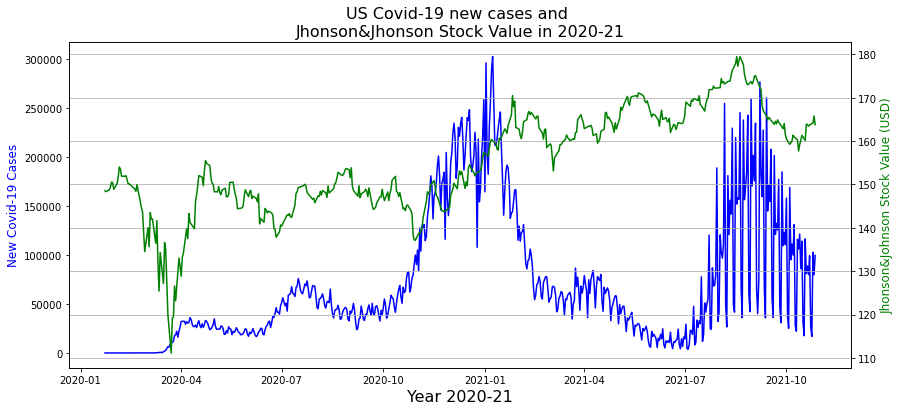

In [15]:
#Create the graph by using the teo datasets
#set the size of the graph
fig, ax1 = plt.subplots(figsize = (14,6))

#set two axes instead of one
ax2 = ax1.twinx()

#use the first dataset of covid
ax1.plot(df['date'], df['new_cases'], 'b')
# use the second dataset of Pfizer stock prices
ax2.plot(df2['Date'], df2['Close'], 'g')

# set the X axis label
ax1.set_xlabel('Year 2020-21', size = 16)

#set the Y axis label for each side to the dataset ax1 for covid ax2 for stoxk prices
ax1.set_ylabel('New Covid-19 Cases', color = 'b', size =12)
ax2.set_ylabel('Jhonson&Johnson Stock Value (USD)', color = 'g', size =12)

#set your title
plt.title('US Covid-19 new cases and \nJhonson&Jhonson Stock Value in 2020-21', size = 16, color = 'k')
plt.grid()
#plt.savefig('Covid-19_.jpeg', dpi=300)

plt.show()
